<a href="https://www.kaggle.com/code/bhavsarshivani/customer-clustering-with-k-means-part-2?scriptVersionId=111044688" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div align="center" style="color:white;
           background-color:#0D5784;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> Clustering with Hierarchical , K-Means , DBSCAN </center>
<p style="padding: 5px;color:white;"> 
    
------- 
    </p>    
  </div>
 

<div align="center" style="color:white;
           background-color:#852332FF;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> PART 2 : Clustering with K-Means  </center>
<p style="padding: 5px;color:white;"> 
    </p>    
</div>

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> DATA : Segmentation </center>
<p style="padding: 5px;color:white;"> 
    </p>    
  </div>

In [2]:
df = pd.read_csv("../input/customer-clustering/segmentation data.csv",index_col=0)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


* Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

* You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

## Data Description:
-----

>The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 										


### Data dictionary:

ID

* numerical
* unique identifier of each customer

Sex

* categrical
* 0: male, 1: female

Marital status

* categorical
* 0: single, 1: non-single (divorced, separated, married, widowed)

Age

* numerical
* age in years

Education

* categorical
* 0: other/unknown, 1: high school, 2: university, 3: graduate school

Income

* numerical
* annual income in USD
* Occupation

categorical

* 0: unemployed/unskilled,
* 1: skilled employee/official, 
* 2: management/self-employed/highly qualified employed/officer

Settlement size

* categorical
* 0: small city, 1: mid-sized city, 2: big city

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [4]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> Clustering  </center>
<p style="padding: 5px;color:white;"> 
    </p>    
  </div>


### 1. Supervised learning : 
>when we are given a target variable which we have to predict based on a given set of independent variables, such problems are called supervised learning problems.

### 2. UnSupervised learning : 
>There might be situations when we do not have any dependent variable to predict. Such problems, without any explicit dependent variable, are known as unsupervised learning problems.

>In such situation we try to divide the entire data into a set of groups. These groups are known as clusters and the process of making these clusters is known as clustering.

>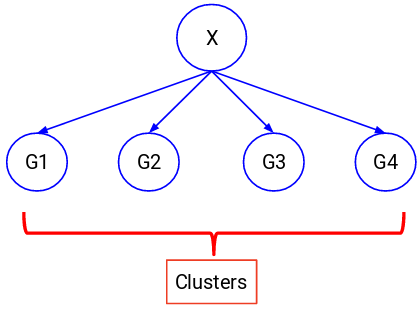

>There are a LOT more applications of unsupervised learning , Here we discuss about clustering

<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> K-Means Clustering  </center>
<p style="padding: 5px;color:white;"> 
    </p>    
  </div>
    
    
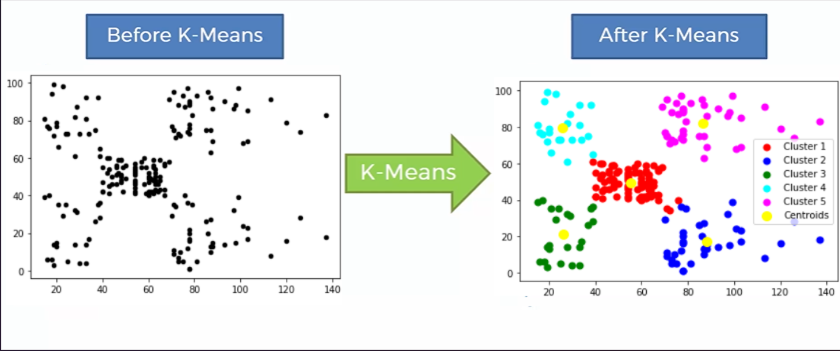


* K-means clustering is an unsupervised technique that requires no labeled response for the given input data or It is used to find groups which have not been explicitly labeled in the data.


* spherical shapeGenerally, practitioners begin by learning about the architecture of the dataset. K-means clusters data points into unique, non-overlapping groupings. It works very well when the clusters have a spherical form. However, it suffers from the fact that clusters’ geometric forms depart from spherical shapes.Data points are clustered based on feature similarity.


* How to select K-Value :
>When after adding a new cluster the total variation within each cluster is smaller than before.

* How K-Means clustering different from hierarchical Clustering ?
>K-Means clustering specifically tries to put the data into the number of clusters you tell it  to. Hierarchical clustering just tells you pairwise, what two things are most similar.

In [5]:
data_km = df.copy()
data_km

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [6]:
#Standardizing the data
scaler = StandardScaler()
scaled_data_km = scaler.fit_transform(data_km.iloc[:,1:])
scaled_data_km

array([[-0.99302433,  2.65361447,  1.60432297,  0.09752361,  0.29682303,
         1.552326  ],
       [ 1.00702467, -1.18713209, -0.06337243,  0.78265438,  0.29682303,
         1.552326  ],
       [-0.99302433,  1.11731585, -0.06337243, -0.83320224, -1.26952539,
        -0.90972951],
       ...,
       [-0.99302433, -0.41898277, -1.73106782, -0.90695688, -1.26952539,
        -0.90972951],
       [ 1.00702467, -1.01643224, -0.06337243, -0.60332923, -1.26952539,
        -0.90972951],
       [-0.99302433, -0.93108232, -1.73106782, -1.3789866 , -1.26952539,
        -0.90972951]])

<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> Difference ways to measure the distance between two clusters </center>
<p style="padding: 5px;color:white;"> 
    </p>    
  </div>


* Elbow Method :
---
>To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

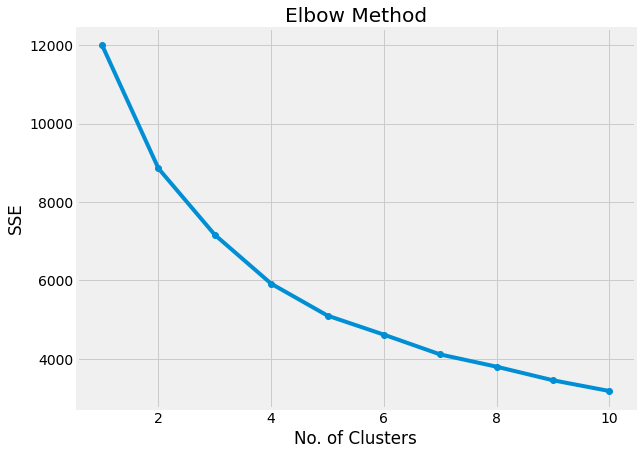

In [7]:
plt.figure(figsize=(10,7))
SSE = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters=i,random_state=0)
  kmeans2.fit(scaled_data_km)
  SSE.append(kmeans2.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11),SSE , marker = "o")
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE")
plt.show()

* If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically.

## Checking Elbow point :

In [8]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [9]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
kl.elbow

4

>The number of clusters shall be taken as 4.

In [10]:
#Build Cluster algorithm
km= KMeans(n_clusters=4,random_state=42)
km.fit(scaled_data_km)

KMeans(n_clusters=4, random_state=42)

In [11]:
#saving the clusters 
y_km = km.fit_predict(scaled_data_km)
y_km

array([3, 2, 1, ..., 1, 0, 1], dtype=int32)

In [12]:
km.labels_

array([3, 2, 1, ..., 1, 0, 1], dtype=int32)

In [13]:
# The lowest SSE value
km.inertia_

5918.52960824439

In [14]:
# The number of iterations required to converge
km.n_iter_

15

In [15]:
score = silhouette_score(scaled_data_km, km.labels_ , random_state=42)
score

0.2867716441205133

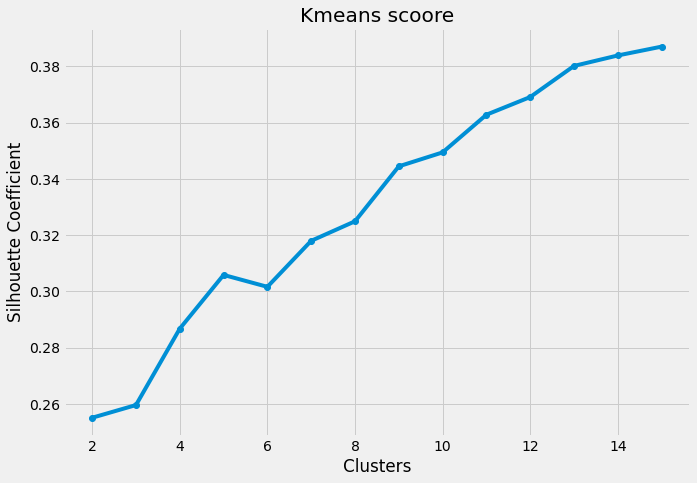

In [16]:
plt.figure(figsize=(10,7))
kmean_scores = []
kmean_index = range(2, 16)
for i in kmean_index:
  kmeans = KMeans(n_clusters=i,random_state=42)
  labels = kmeans.fit_predict(scaled_data_km)
  kmean_scores.append(silhouette_score(scaled_data_km, labels))

plt.style.use("fivethirtyeight")
plt.plot(kmean_index,kmean_scores , marker = "o")
plt.title("Kmeans scoore")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [17]:
#assign clusters to the dataset
data_km["cluster_km"] = km.labels_
data_km.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_km
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,3
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2


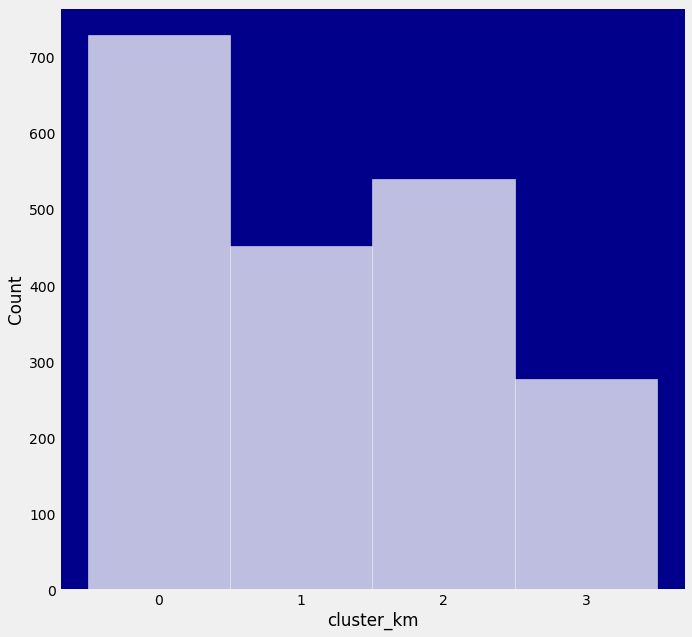

In [18]:
data_km['cluster_km'] = y_km
data_km.cluster_km = data_km.cluster_km.astype(str)
data_km = data_km.sort_values("cluster_km")

plt.figure(figsize=(10,10))
plt.axes(facecolor='darkblue')
sns.histplot(data_km.cluster_km, color = "white")
plt.grid()
plt.show()

In [19]:
#number of datapoints for each clusters
data_km["cluster_km"].value_counts()

0    730
2    540
1    452
3    278
Name: cluster_km, dtype: int64

In [20]:
df_clustered2 = data_km.sort_values("cluster_km")
df_clustered2.iloc[:,[-1]]

,cluster_km
ID,
100001689,0
100000110,0
100001254,0
100001984,0
100001983,0
...,...
100000148,3
100001155,3
100001302,3


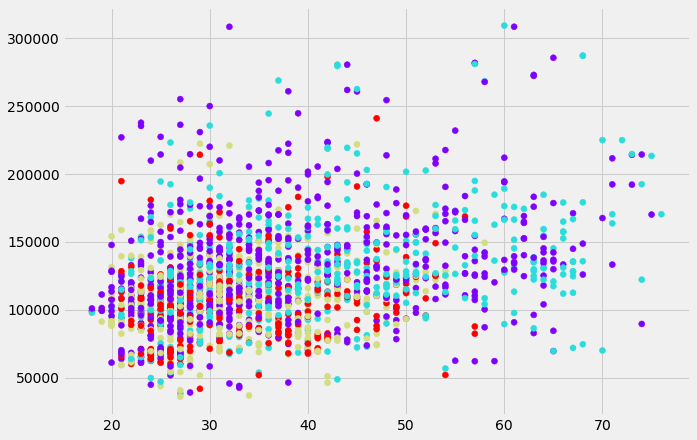

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(data_km['Age'],data_km['Income'],c=km.labels_,cmap='rainbow')

<div align="center" style="color:white;
           background-color:#852332FF;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> Check PART 3 : Clustering with DBSCAN </center>
<p style="padding: 5px;color:white;"> 
    </p>    
</div> 

<div align="center" style="color:white;
           background-color:#16507F;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
   <center>⪻◥◤◢◣⚜Thank You⚜◥◤◢◣⪼</center>
<p style="padding: 5px;color:white;">
     </p>
    </div>